Team 46

Members: Anthony Cheng, David Chu, Eric Huang, and Ethan Chang

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_dictionary = pd.read_csv("/content/sample_data/02 Data Dictionary.csv")
ff_sr = pd.read_csv("/content/sample_data/FF_SR_ data.csv")
food_cat_id = pd.read_csv("/content/sample_data/food_category_id table.csv")
nutrient_id = pd.read_csv("/content/sample_data/nutrient_id table.csv")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [6]:
ff_sr.head()


FF_NDB  SR_NDB  food_category_id FF Food description SR Food description  \
0   16158   16158                16  Hummus, commercial  Hummus, commercial   
1   16158   16158                16  Hummus, commercial  Hummus, commercial   
2   16158   16158                16  Hummus, commercial  Hummus, commercial   
3   16158   16158                16  Hummus, commercial  Hummus, commercial   
4   16158   16158                16  Hummus, commercial  Hummus, commercial   

   Nutrient_id  rank                  FF_Component  \
0         1090  5500                 Magnesium, Mg   
1         1258  9700  Fatty acids, total saturated   
2         1089  5400                      Iron, Fe   
3         1051   100                         Water   
4         1103  6200                  Selenium, Se   

                   SR_Component unit_name  ...  SR Min  SR Max   Std_Error  \
0                 Magnesium, Mg        MG  ...     NaN     NaN         NaN   
1  Fatty acids, total saturated         G  ...     NaN     NaN         NaN   
2                      Iron, Fe        MG  ...     NaN     NaN         NaN   
3                         Water         G  ...     NaN     NaN         NaN   
4                  Selenium, Se        UG  ...     NaN     NaN         NaN   

   SR Num_Data_pts  FF Mean per 100g  FF Min  FF Max  FF Median  \
0                2             71.10   56.60   82.00      70.40   
1                0              2.22     NaN     NaN        NaN   
2                2              2.41    1.87    2.96       2.33   
3                2             58.70   56.10   65.60      57.60   
4                0             16.20    0.00   32.30      16.20   

   FF data_points  FF Publication Date  
0            11.0             4/1/2019  
1             NaN             4/1/2019  
2            11.0             4/1/2019  
3            11.0             4/1/2019  
4             2.0             4/1/2019  

[5 rows x 21 columns]

df = pd.DataFrame(df_array, columns=['VIN','Vehicle Class','Acquisition Date','FUEL NAME', 'Mileage','CITY','STATE','ZIP','Days_In_Service'])

In [7]:
# unique values of the FF publication date
ff_sr["FF Publication Date"].unique()

array(['4/1/2019', '12/16/2019', '4/1/2020', '10/30/2020', '4/28/2021',
       '10/28/2021', '4/28/2022', '10/28/2022', '4/20/2023', '10/19/2023'],
      dtype=object)

In [8]:
#splitting ff_sr
ff_df = ff_sr[["FF_NDB", "FF Food description", "Nutrient_id", "FF_Component", "FF Mean per 100g", "FF Min", "FF Max", "FF Median", "FF data_points", "FF Publication Date"]]

sr_df = ff_sr[["SR_NDB","food_category_id","SR Food description","Nutrient_id","rank", "SR_Component","unit_name","SR Mean per 100g","SR Min","SR Max"," Std_Error", "SR Num_Data_pts"]]



In [9]:
#Looks for FF - SR
net_pos = pd.DataFrame()
net_pos = ff_sr[["FF_NDB", "SR_NDB", "SR Food description","Nutrient_id","unit_name", "FF Mean per 100g", "SR Mean per 100g", "FF_Component"]]

net_pos['rank'] = ff_df["FF Mean per 100g"] - sr_df["SR Mean per 100g"];
net_pos['percent_change'] = net_pos['rank'] / sr_df["SR Mean per 100g"]


#net_pos['rank'] = net_pos['rank'].abs().groupby.rank(ascending=False)
#net_pos['rank'] = net_pos['rank'].abs().groupby(net_pos['rank']).rank(ascending=False)
#df['rank'] = df['columnB'].abs().groupby(df['columnA']).rank(ascending=False)



# rows sorted by percent change of mean per 100g (from SR to FF)
net_pos.sort_values(by="percent_change")

<ipython-input-9-c5682a00fc16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['rank'] = ff_df["FF Mean per 100g"] - sr_df["SR Mean per 100g"];
<ipython-input-9-c5682a00fc16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['percent_change'] = net_pos['rank'] / sr_df["SR Mean per 100g"]


FF_NDB  SR_NDB  \
3855   12120   12120   
2625   11266   11266   
2626   11266   11266   
1055    1036    1036   
3538    9316    9316   
2642   11266   11266   
4227   23103   23103   
2648   11993   11993   
2663   11993   11993   
3525   11112   11112   
2689   11124   11124   
2696   11960   11960   
1088    1082    1082   
3502   11109   11109   
2721   11333   11333   
1891    1001    1001   
1105    1082    1082   
1882    1001    1001   
3491   11205   11205   
1880    1001    1001   
1879    1001    1001   
1876    1001    1001   
3479   11143   11143   
1132    2047    2047   
1866    1001    1001   
1135    2047    2047   
1856   20061   20061   
1137    2047    2047   
3472   11143   11143   
1140    2047    2047   
2621   11266   11266   
3469   11143   11143   
2617   11950   11950   
1427    1077    1077   
148     1172    1172   
4291    1025    1025   
152     1172    1172   
155     1172    1172   
4283    1025    1025   
2078    9500    9500   
2076    9500    9500   
2075    9500    9500   
2573   11243   11243   
168     1173    1173   
4272    1025    1025   
2574   11243   11243   
3549    9316    9316   
172     1173    1173   
4271    1025    1025   
2055    9040    9040   
180     1173    1173   
2046    9040    9040   
4266    1118    1118   
2044    9040    9040   
4264    1118    1118   
2589   11243   11243   
2037    9040    9040   
3960   16069   16069   
4261    1118    1118   
4260    1118    1118   
2596   11950   11950   
2599   11950   11950   
2600   11950   11950   
2610   11950   11950   
2751   11951   11951   
4179   23270   23270   
2752   11951   11951   
3066    1012    1012   
3073    1012    1012   
3075    1012    1012   
1569    1124    1124   
3093    1017    1017   
3097    1017    1017   
4113   10224   10224   
3106    1017    1017   
443    12537   12537   
1545   11090   11090   
3108    1017    1017   
3114    1053    1053   
1316    7954    7954   
1526   11090   11090   
3119    1053    1053   
3317   12155   12155   
3121    1053    1053   
1519   11090   11090   
396     9123    9123   
1343    7089    7089   
3133    1053    1053   
3139    1056    1056   
3142    1056    1056   
3154    1056    1056   
1348    7089    7089   
3264   12061   12061   
1413    1077    1077   
3239   12147   12147   
1418    1077    1077   
3053   12220   12220   
447    12537   12537   
1268    1079    1079   
1616    4582    4582   
3461   11052   11052   
2773   11821   11821   
2780   11821   11821   
3439    9070    9070   
2790    1088    1088   
1787   20481   20481   
2829    1116    1116   
3430    9070    9070   
4164    5096    5096   
1174    1085    1085   
4157    5062    5062   
2872    1019    1019   
2873    1019    1019   
2890    1019    1019   
4294    1025    1025   
3401    9266    9266   
1716    1145    1145   
2923   16098   16098   
1222    1079    1079   
1675    1123    1123   
1223    1079    1079   
1227    1079    1079   
1662    1123    1123   
1238    1079    1079   
1660    1123    1123   
1263    1079    1079   
1645    4044    4044   
1642    4044    4044   
1622    4582    4582   
1620    4582    4582   
1199    1085    1085   
2120    9504    9504   
2026    9040    9040   
75     12563   12563   
47     11056   11056   
3641   20011   20011   
2191    9501    9501   
3898   12131   12131   
2286   11238   11238   
4358    1228    1228   
2452    9400    9400   
2301   11260   11260   
4365    1228    1228   
4366    1228    1228   
3753   23562   23562   
4323    1035    1035   
3907   12151   12151   
4322    1035    1035   
2509   43382   43382   
3676   20008   20008   
2184    9501    9501   
4354    1228    1228   
4348    1228    1228   
2246   11987   11987   
845     1133    1133   
4339    1035    1035   
853     1133    1133   
142     1171    1171   
2255   11987   11987   
2495    9130    9130   
92     12563   12563   
4346    1035    1035   
63     12563   12563   
62     12563   12563   
3693   20031   20031   
60     12563   12563  

In [10]:
print(ff_sr.iloc[[1327]]["SR Mean per 100g"])
print(ff_sr.iloc[[1327]]["FF Mean per 100g"])
print((net_pos.iloc[[1327]])["percent_change"])
ff_sr.iloc[[1327]]
# row with greatest percent change (from SR to FF)

1327    0.03
Name: SR Mean per 100g, dtype: float64
1327    3.37
Name: FF Mean per 100g, dtype: float64
1327    111.333333
Name: percent_change, dtype: float64


FF_NDB  SR_NDB  food_category_id  \
1327    7954    7954                 7   

                                           FF Food description  \
1327  Sausage, breakfast sausage, beef, pre-cooked, unprepared   

           SR Food description  Nutrient_id  rank  \
1327  Beef sausage, pre-cooked         1005  1110   

                     FF_Component                 SR_Component unit_name  ...  \
1327  Carbohydrate, by difference  Carbohydrate, by difference         G  ...   

      SR Min  SR Max   Std_Error  SR Num_Data_pts  FF Mean per 100g  FF Min  \
1327     NaN     NaN         NaN                0              3.37     NaN   

      FF Max  FF Median  FF data_points  FF Publication Date  
1327     NaN        NaN             NaN           12/16/2019  

[1 rows x 21 columns]

In [11]:
# rows where the mean per 100g went to 0 (from SR to FF)
ff_sr[(ff_sr["FF Mean per 100g"]==0) & (ff_sr["SR Mean per 100g"]!=0)]

FF_NDB  SR_NDB  food_category_id  \
47     11056   11056                11   
60     12563   12563                12   
62     12563   12563                12   
63     12563   12563                12   
75     12563   12563                12   
92     12563   12563                12   
135     1171    1171                 1   
142     1171    1171                 1   
148     1172    1172                 1   
152     1172    1172                 1   
155     1172    1172                 1   
168     1173    1173                 1   
172     1173    1173                 1   
180     1173    1173                 1   
396     9123    9123                 9   
443    12537   12537                12   
447    12537   12537                12   
645     9191    9191                 9   
662     9191    9191                 9   
668     9191    9191                 9   
845     1133    1133                 1   
853     1133    1133                 1   
890     1137    1137                 1   
1006    7028    7028                 7   
1013    1036    1036                 1   
1055    1036    1036                 1   
1088    1082    1082                 1   
1105    1082    1082                 1   
1132    2047    2047                 2   
1135    2047    2047                 2   
1137    2047    2047                 2   
1140    2047    2047                 2   
1174    1085    1085                 1   
1199    1085    1085                 1   
1222    1079    1079                 1   
1223    1079    1079                 1   
1227    1079    1079                 1   
1238    1079    1079                 1   
1263    1079    1079                 1   
1268    1079    1079                 1   
1316    7954    7954                 7   
1343    7089    7089                 7   
1348    7089    7089                 7   
1413    1077    1077                 1   
1418    1077    1077                 1   
1427    1077    1077                 1   
1519   11090   11090                11   
1526   11090   11090                11   
1545   11090   11090                11   
1569    1124    1124                 1   
1616    4582    4582                 4   
1620    4582    4582                 4   
1622    4582    4582                 4   
1642    4044    4044                 4   
1645    4044    4044                 4   
1660    1123    1123                 1   
1662    1123    1123                 1   
1675    1123    1123                 1   
1716    1145    1145                 1   
1787   20481   20481                20   
1856   20061   20061                20   
1866    1001    1001                 1   
1876    1001    1001                 1   
1879    1001    1001                 1   
1880    1001    1001                 1   
1882    1001    1001                 1   
1891    1001    1001                 1   
2026    9040    9040                 9   
2037    9040    9040                 9   
2044    9040    9040                 9   
2046    9040    9040                 9   
2055    9040    9040                 9   
2075    9500    9500                 9   
2076    9500    9500                 9   
2078    9500    9500                 9   
2120    9504    9504                 9   
2154    9502    9502                 9   
2156    9502    9502                 9   
2184    9501    9501                 9   
2191    9501    9501                 9   
2246   11987   11987                11   
2255   11987   11987                11   
2286   11238   11238                11   
2301   11260   11260                11   
2327   16222   16222                16   
2364   14091   14091                14   
2365   14091   14091                14   
2370   14091   14091                14   
2374   14091   14091                14   
2377   14091   14091                14   
2404   11457   11457                11   
2421   20140   20140                20   
2452    9400    9400                 9   
2495    9130    9130                 9   
2509   43382   4

In [12]:
# rows where SS mean was 0
print(len(ff_sr[ff_sr["SR Mean per 100g"]==0].index))
ff_sr[ff_sr["SR Mean per 100g"]==0]

367


FF_NDB  SR_NDB  food_category_id  \
26     16158   16158                16   
29     11056   11056                11   
33     11056   11056                11   
48     11056   11056                11   
53     12563   12563                12   
58     12563   12563                12   
71     12563   12563                12   
72     12563   12563                12   
74     12563   12563                12   
77     12563   12563                12   
110    11233   11233                11   
145     1171    1171                 1   
150     1172    1172                 1   
151     1172    1172                 1   
156     1172    1172                 1   
161     1172    1172                 1   
162     1172    1172                 1   
164     1172    1172                 1   
175     1173    1173                 1   
181     1173    1173                 1   
183     1173    1173                 1   
185     1173    1173                 1   
189    11296   11296                11   
215    11296   11296                11   
219    11296   11296                11   
232    11296   11296                11   
236    11937   11937                11   
242    11937   11937                11   
248    11937   11937                11   
251    11937   11937                11   
253    11937   11937                11   
254    11937   11937                11   
271    11937   11937                11   
279     1032    1032                 1   
284     1032    1032                 1   
286     1032    1032                 1   
288     1032    1032                 1   
293     1032    1032                 1   
305     1032    1032                 1   
309     1032    1032                 1   
310     1032    1032                 1   
312     1032    1032                 1   
313     1032    1032                 1   
317     1032    1032                 1   
318     1032    1032                 1   
324     1042    1042                 1   
326     1042    1042                 1   
330     1042    1042                 1   
331     1042    1042                 1   
344     1042    1042                 1   
365     1042    1042                 1   
367     1042    1042                 1   
381     9123    9123                 9   
392     9123    9123                 9   
402     9123    9123                 9   
408    12537   12537                12   
413    12537   12537                12   
428    12537   12537                12   
435    12537   12537                12   
437    12537   12537                12   
440    12537   12537                12   
442    12537   12537                12   
446    12537   12537                12   
448    12537   12537                12   
449    12537   12537                12   
450    12537   12537                12   
460    18069   18069                18   
480    18069   18069                18   
482    18069   18069                18   
494     2046    2046                 2   
504     2046    2046                 2   
533     2046    2046                 2   
537     2046    2046                 2   
543     2046    2046                 2   
544     2046    2046                 2   
549     2046    2046                 2   
552     2046    2046                 2   
555     2046    2046                 2   
559     2046    2046                 2   
563     9148    9148                 9   
578     9148    9148                 9   
579     9148    9148                 9   
583     9148    9148                 9   
595     9148    9148                 9   
608     9148    9148                 9   
615     9148    9148                 9   
617     9148    9148                 9   
620     9148    9148                 9   
634     9191    9191                 9   
641     9191    9191                 9   
647     9191    9191                 9   
665     9191    9191                 9   
670     9191    9191                 9   
672     9191    9191                 9   
674     9191    

In [13]:
#FF and SR that have Mean Per 100g = 0
#print(len(ff_sr[ff_sr["SR Mean per 100g"]==0].index))
print()
zero_change = ff_sr[(ff_sr["SR Mean per 100g"]==0) & (ff_sr["FF Mean per 100g"]==0)]
zero_change


FF_NDB  SR_NDB  food_category_id  \
26     16158   16158                16   
29     11056   11056                11   
33     11056   11056                11   
48     11056   11056                11   
53     12563   12563                12   
58     12563   12563                12   
72     12563   12563                12   
74     12563   12563                12   
77     12563   12563                12   
110    11233   11233                11   
145     1171    1171                 1   
151     1172    1172                 1   
161     1172    1172                 1   
162     1172    1172                 1   
164     1172    1172                 1   
183     1173    1173                 1   
185     1173    1173                 1   
189    11296   11296                11   
215    11296   11296                11   
219    11296   11296                11   
232    11296   11296                11   
236    11937   11937                11   
242    11937   11937                11   
248    11937   11937                11   
251    11937   11937                11   
253    11937   11937                11   
254    11937   11937                11   
271    11937   11937                11   
279     1032    1032                 1   
284     1032    1032                 1   
286     1032    1032                 1   
288     1032    1032                 1   
293     1032    1032                 1   
305     1032    1032                 1   
309     1032    1032                 1   
310     1032    1032                 1   
312     1032    1032                 1   
313     1032    1032                 1   
317     1032    1032                 1   
318     1032    1032                 1   
324     1042    1042                 1   
326     1042    1042                 1   
330     1042    1042                 1   
331     1042    1042                 1   
344     1042    1042                 1   
365     1042    1042                 1   
367     1042    1042                 1   
381     9123    9123                 9   
392     9123    9123                 9   
402     9123    9123                 9   
413    12537   12537                12   
428    12537   12537                12   
437    12537   12537                12   
440    12537   12537                12   
442    12537   12537                12   
446    12537   12537                12   
448    12537   12537                12   
449    12537   12537                12   
460    18069   18069                18   
480    18069   18069                18   
494     2046    2046                 2   
533     2046    2046                 2   
537     2046    2046                 2   
543     2046    2046                 2   
544     2046    2046                 2   
549     2046    2046                 2   
555     2046    2046                 2   
559     2046    2046                 2   
563     9148    9148                 9   
578     9148    9148                 9   
583     9148    9148                 9   
595     9148    9148                 9   
608     9148    9148                 9   
615     9148    9148                 9   
617     9148    9148                 9   
620     9148    9148                 9   
634     9191    9191                 9   
641     9191    9191                 9   
647     9191    9191                 9   
665     9191    9191                 9   
670     9191    9191                 9   
672     9191    9191                 9   
699     1009    1009                 1   
704     1009    1009                 1   
707     1009    1009                 1   
711     1009    1009                 1   
712     1009    1009                 1   
720     1009    1009                 1   
725     1009    1009                 1   
731     1009    1009                 1   
732     1009    1009                 1   
735     1009    1009                 1   
741     1015    1015                 1   
744     1015    1015                 1   
745     1015    

In [14]:
nutrient_table = ff_sr[["FF Food description", "FF_Component", "FF Mean per 100g", "SR Food description", "SR_Component", "SR Mean per 100g"]]
nutrient_table.head()

FF Food description                  FF_Component  FF Mean per 100g  \
0  Hummus, commercial                 Magnesium, Mg             71.10   
1  Hummus, commercial  Fatty acids, total saturated              2.22   
2  Hummus, commercial                      Iron, Fe              2.41   
3  Hummus, commercial                         Water             58.70   
4  Hummus, commercial                  Selenium, Se             16.20   

  SR Food description                  SR_Component  SR Mean per 100g  
0  Hummus, commercial                 Magnesium, Mg            71.000  
1  Hummus, commercial  Fatty acids, total saturated             1.437  
2  Hummus, commercial                      Iron, Fe             2.440  
3  Hummus, commercial                         Water            66.590  
4  Hummus, commercial                  Selenium, Se             2.600

In [15]:
# rows where percent change is -1, SR originally has something, FF indicates that said values decreased to 0 or were lost
net_pos_percent = net_pos[net_pos["percent_change"] == -1].sort_values(by=['FF_NDB'])
net_pos_percent["FF_NDB"] = (net_pos_percent["FF_NDB"]/1000).astype(int)
net_pos_percent["SR_NDB"] = (net_pos_percent["SR_NDB"]/1000).astype(int)

#print(net_pos_percent["FF_NDB"].unique())
#[ 1  2  4  5  7  9 10 11 12 14 16 20 23 43]
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==1])/200)*100) #40% of the negative changes belong to group 1: "Dairy and Egg Products"
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==2])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==4])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==5])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==7])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==9])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==10])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==11])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==12])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==14])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==16])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==20])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==23])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==43])/200)*100)

print((len(net_pos_percent[net_pos_percent["FF_NDB"]==1])/1357)*100) #40% of the negative changes belong to group 1: "Dairy and Egg Products"

40.0
2.0
2.5
1.5
2.0
14.499999999999998
1.0
18.5
7.5
2.5
1.5
3.5000000000000004
2.0
1.0
5.895357406042741


In [16]:
#1357 food category 1 items
ff_sr['FF Food description'].value_counts()[1]

69

In [17]:
# rows where percent change in infinity, original value was 0, later increased in added nutrients
net_pos[net_pos["percent_change"]==np.inf]

FF_NDB  SR_NDB  \
71     12563   12563   
150     1172    1172   
156     1172    1172   
175     1173    1173   
181     1173    1173   
408    12537   12537   
435    12537   12537   
450    12537   12537   
482    18069   18069   
504     2046    2046   
552     2046    2046   
579     9148    9148   
674     9191    9191   
694     1009    1009   
791     1029    1029   
1156    1085    1085   
1305    7954    7954   
1324    7954    7954   
1331    7954    7954   
1450    7919    7919   
1600    1125    1125   
1614    1125    1125   
1615    4582    4582   
1855   20061   20061   
1886    1001    1001   
1887    1001    1001   
1892    1001    1001   
1913    1001    1001   
1916    1001    1001   
2214    4042    4042   
2216    4042    4042   
2221    4511    4511   
2222    4511    4511   
2353   14091   14091   
2354   14091   14091   
2357   14091   14091   
2369   14091   14091   
2372   14091   14091   
2444    9400    9400   
2484    9130    9130   
2603   11950   11950   
2782    1088    1088   
2803    1088    1088   
4197   23325   23325   
4253    1118    1118   
4254    1118    1118   

                                                                                 SR Food description  \
71                                                       Nuts, almonds, dry roasted, with salt added   
150                                                             Egg, white, raw, frozen, pasteurized   
156                                                             Egg, white, raw, frozen, pasteurized   
175                                                                                Egg, white, dried   
181                                                                                Egg, white, dried   
408                                      Seeds, sunflower seed kernels, dry roasted, with salt added   
435                                      Seeds, sunflower seed kernels, dry roasted, with salt added   
450                                      Seeds, sunflower seed kernels, dry roasted, with salt added   
482                                 Bread, white, commercially prepared (includes soft bread crumbs)   
504                                                                        Mustard, prepared, yellow   
552                                                                        Mustard, prepared, yellow   
579                                                                            Kiwifruit, green, raw   
674                                                                                  Nectarines, raw   
694                                                                                  Cheese, cheddar   
791                                                      Cheese, mozzarella, low moisture, part-skim   
1156                      Milk, nonfat, fluid, with added vitamin A and vitamin D (fat free or skim)   
1305                                                                        Beef sausage, pre-cooked   
1324                                                                        Beef sausage, pre-cooked   
1331                                                                        Beef sausage, pre-cooked   
1450                                                          Sausage, turkey, breakfast links, mild   
1600                                                                           Egg, yolk, raw, fresh   
1614                                                                           Egg, yolk, raw, fresh   
1615                                                                                     Oil, canola   
1855                                                                   Rice flour, white, unenriched   
1886                                                                                  Butter, salted   
1887                                                                                  Butter, salted   
1892                                                                 

In [18]:
# making dataframe for FF components
sorted_FF = sorted(net_pos["FF_Component"].unique())
neg1_count = np.array([])
neg_count = np.array([])
zero_count = np.array([])
pos_count = np.array([])
inf_count = np.array([])

for comp in sorted_FF:
  net_pos_of_comp = net_pos[net_pos["FF_Component"] == comp]
  neg1_count = np.append(neg1_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == -1].index))
  neg_count = np.append(neg_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] < 0].index))
  zero_count = np.append(zero_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == 0].index))
  pos_count = np.append(pos_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] > 0].index))
  inf_count = np.append(inf_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == np.inf].index))

comp_cols = {'FF_Component': sorted_FF, 'Neg 1 Count': neg1_count, 'Neg Count': neg_count, 'Zero Count': zero_count, "Positive Count": pos_count, "Inf Count": inf_count}
FF_comp_df = pd.DataFrame(comp_cols)
FF_comp_df["Nonzero Count"] = FF_comp_df["Neg Count"] + FF_comp_df["Positive Count"]
FF_comp_df["% Changed for Component"] = FF_comp_df["Nonzero Count"] / (FF_comp_df["Neg Count"] + FF_comp_df["Zero Count"] + FF_comp_df["Positive Count"])

FF_comp_df.sort_values(by="% Changed for Component", ascending = False)

FF_Component  Neg 1 Count  Neg Count  \
29                                   Lactose          1.0        8.0   
48                                  SFA 14:0          0.0        8.0   
50                                  SFA 18:0          0.0       14.0   
51                                  SFA 20:0          0.0        3.0   
18                  Fatty acids, total trans          0.0        7.0   
47                                  SFA 12:0          0.0        2.0   
16        Fatty acids, total polyunsaturated          1.0       32.0   
31                                  Lycopene          0.0        0.0   
52                                  SFA 22:0          0.0        2.0   
57                              Stigmasterol          0.0        3.0   
60                             Sugars, total          0.0        0.0   
67                         Tocotrienol, beta          0.0        1.0   
68                        Tocotrienol, delta          2.0        3.0   
46                                  SFA 10:0          0.0        3.0   
8                Carbohydrate, by difference          5.0       90.0   
7                                Campesterol          6.0        8.0   
75                              Vitamin B-12          3.0       14.0   
80               Vitamin D2 (ergocalciferol)          3.0        8.0   
4                            Beta-sitosterol          0.0        3.0   
49                                  SFA 16:0          0.0        9.0   
86                                     Water          0.0       91.0   
41                              Potassium, K          0.0       76.0   
43                                   Protein          1.0       84.0   
70                         Total lipid (fat)          1.0       67.0   
33                             Magnesium, Mg          1.0       86.0   
35                             Manganese, Mn         25.0       92.0   
17              Fatty acids, total saturated          1.0       31.0   
15        Fatty acids, total monounsaturated          1.0       42.0   
27                                  Iron, Fe         21.0      110.0   
2                                        Ash          0.0       83.0   
87                                  Zinc, Zn          1.0       82.0   
55                                Sodium, Na         22.0      101.0   
53                              Selenium, Se         12.0       40.0   
77            Vitamin C, total ascorbic acid          2.0       15.0   
37                                    Niacin          2.0       42.0   
23                                   Glucose          3.0       13.0   
6                                Calcium, Ca          2.0       80.0   
58                                   Sucrose          7.0       20.0   
38                          Pantothenic acid          0.0        7.0   
12                                Copper, Cu         19.0       87.0   
76                               Vitamin B-6          3.0       53.0   
32                                    Lysine          0.0       10.0   
54                                    Serine          0.0       14.0   
30                                   Leucine          0.0        8.0   
62                                 Threonine          0.0        9.0   
72                                  Tyrosine          0.0       10.0   
3                              Aspartic acid          0.0       13.0   
73                                    Valine          0.0       13.0   
0                                    Alanine          0.0       11.0   
24                             Glutamic acid          0.0        9.0   
39                             Phenylalanine          0.0       11.0   
1                                   Arginine          0.0        8.0   
42                                   Proline          0.0        5.0   
25                                   Glycine          0.0       10.0   
40                             Phosphorus, P          1.0       80.0   


In [19]:
for comp in sorted_FF:
  print(comp)

Alanine
Arginine
Ash
Aspartic acid
Beta-sitosterol
Betaine
Calcium, Ca
Campesterol
Carbohydrate, by difference
Carotene, beta
Cholesterol
Choline, total
Copper, Cu
Cystine
Energy
Fatty acids, total monounsaturated
Fatty acids, total polyunsaturated
Fatty acids, total saturated
Fatty acids, total trans
Fiber, total dietary
Folate, total
Fructose
Galactose
Glucose
Glutamic acid
Glycine
Histidine
Iron, Fe
Isoleucine
Lactose
Leucine
Lycopene
Lysine
Magnesium, Mg
Maltose
Manganese, Mn
Methionine
Niacin
Pantothenic acid
Phenylalanine
Phosphorus, P
Potassium, K
Proline
Protein
Retinol
Riboflavin
SFA 10:0
SFA 12:0
SFA 14:0
SFA 16:0
SFA 18:0
SFA 20:0
SFA 22:0
Selenium, Se
Serine
Sodium, Na
Starch
Stigmasterol
Sucrose
Sugars, Total
Sugars, total
Thiamin
Threonine
Tocopherol, beta
Tocopherol, delta
Tocopherol, gamma
Tocotrienol, alpha
Tocotrienol, beta
Tocotrienol, delta
Tocotrienol, gamma
Total lipid (fat)
Tryptophan
Tyrosine
Valine
Vitamin A, RAE
Vitamin B-12
Vitamin B-6
Vitamin C, total ascorb

<ipython-input-20-f79025d7a0a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffilterremove["percent_change"] = dffilterremove["percent_change"] * 100


Text(0, 0.5, 'Data amount')

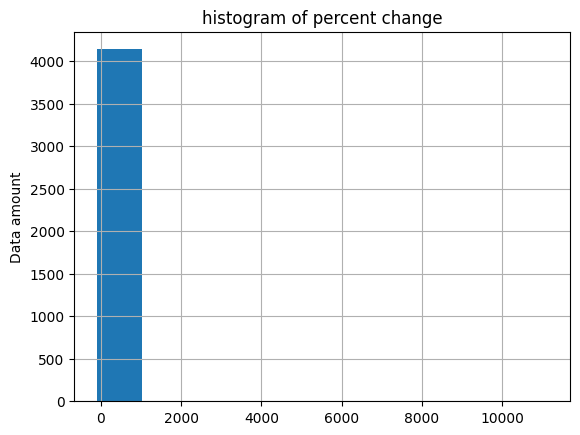

In [20]:
#food, type of nutrient, percent change (remove infinity outliers (could also remove -1.0 which is presence to none))
net_pos = net_pos.fillna(0)
dffilterremove = net_pos[(net_pos["percent_change"] != np.inf) &(net_pos["percent_change"] != -1.0) ]
dffilterremove["percent_change"] = dffilterremove["percent_change"] * 100

dffilterremove.hist(column="percent_change")
plt.title('histogram of percent change')
plt.ylabel('Data amount')



-42.24617492578213
38.53391185202102


Text(0, 0.5, 'Data amount')

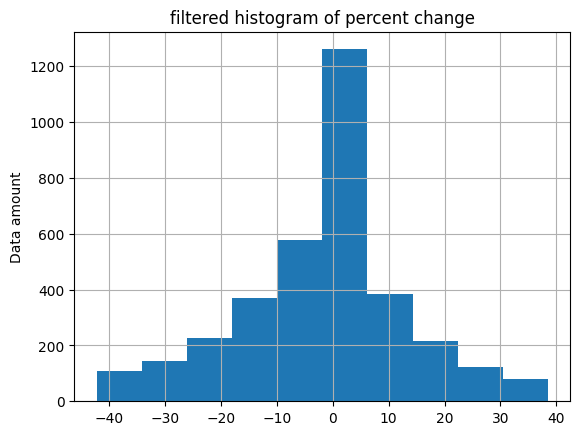

In [21]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = dffilterremove["percent_change"].quantile(0.25)
Q3 = dffilterremove["percent_change"].quantile(0.75)

IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
# Filter out the outliers
outlierfilter = dffilterremove[(dffilterremove["percent_change"] >= lower_bound) & (dffilterremove["percent_change"] <= upper_bound)]


outlierfilter.hist(column="percent_change")
plt.title('filtered histogram of percent change')
plt.ylabel('Data amount')

In [23]:
outliercol = dffilterremove[(dffilterremove["percent_change"] > upper_bound) | (dffilterremove["percent_change"] < lower_bound) ]
outliercol.sort_values(by="percent_change")
counts = outliercol["percent_change"].count()
print(counts) # counts outliers

657
